# WeatherPy
----
### Jake Burns


In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [114]:
#base url from open weather doc site
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#url = 'api.openweathermap.org/data/2.5/weather?'
url =  'http://api.openweathermap.org/data/2.5/weather?'
#testing

#print(url)

#test city London
#city_name= 'London'
# query_url = f'{url}q={city_name}&appid={api_key}'

# #get response-- add json to end to automatically call json
# response = requests.get(query_url)
# response_json= response.json()


#print(json.dumps(response_json, indent=4, sort_keys=True))

In [4]:
# Loop through each city

#empty lists to fill
lat= []
lon= []
temp_max= []
humidity= []
cloudiness= []
wind_speed= []
city_list= []
country_list= []
date_list = []


for city in cities:
    
    query_url = f'{url}q={city}&units=imperial&appid={api_key}'

    #get response-- add json to end to automatically call json
    response = requests.get(query_url)
    response_json= response.json()

    
    # Try to grab the lat, lon, Max Temperature, Humidty%, cloudiness, wind speed
    try:
        lat.append(response_json['coord']['lat'])
        lon.append(response_json['coord']['lon'])
        temp_max.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country_list.append(response_json['sys']['country'])
        date_list.append(response_json['dt'])
        city_list.append(city)
        print(f"{city} found! Appending stats")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found... Skipping... ")
        pass

chapais found! Appending stats
bluff found! Appending stats
at-bashi found! Appending stats
kiunga found! Appending stats
mataura found! Appending stats
City not found... Skipping... 
gizo found! Appending stats
ostrovnoy found! Appending stats
port alfred found! Appending stats
vaini found! Appending stats
soyo found! Appending stats
xining found! Appending stats
bubaque found! Appending stats
morinville found! Appending stats
komsomolskiy found! Appending stats
constitucion found! Appending stats
ushuaia found! Appending stats
tiksi found! Appending stats
tuktoyaktuk found! Appending stats
menzelinsk found! Appending stats
nome found! Appending stats
diego de almagro found! Appending stats
kingussie found! Appending stats
san carlos de bariloche found! Appending stats
barra patuca found! Appending stats
hermanus found! Appending stats
atuona found! Appending stats
da lat found! Appending stats
bredasdorp found! Appending stats
rikitea found! Appending stats
vargem grande found! Appen

In [5]:
#test to see how many cities found:
len(lat)

570

In [6]:
# create DataFrame
weather_df = pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country_list,
    'Date': date_list
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chapais,49.7834,-74.8492,46.40,31,75,14.97,CA,1619901681
1,bluff,-46.6000,168.3333,48.99,83,57,3.00,NZ,1619901682
2,at-bashi,41.1702,75.8106,51.89,65,100,2.57,KG,1619901682
3,kiunga,-6.1219,141.2906,72.14,99,92,1.63,PG,1619901683
4,mataura,-46.1927,168.8643,48.99,83,17,3.00,NZ,1619901684
...,...,...,...,...,...,...,...,...,...
565,amazar,53.8580,120.8750,38.86,78,96,0.96,RU,1619902057
566,qiqihar,47.3408,123.9672,46.11,62,11,5.32,CN,1619902057
567,vila do maio,15.1333,-23.2167,71.60,73,20,23.02,CV,1619902058
568,ilulissat,69.2167,-51.1000,46.40,42,20,12.66,GL,1619902059


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
test= weather_df.loc[weather_df['Humidity'] > 100]
test

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Export DF as csv file
weather_df.to_csv('weather_data.csv', index=False)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

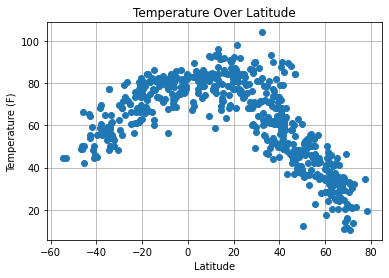

In [119]:
#plot line plot
fig1, ax1 = plt.subplots()

x_latitude= weather_df['Lat']
y_temperature= weather_df['Max Temp']

ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (F)')
ax1.set_title('Temperature Over Latitude')

ax1.plot(x_latitude, y_temperature, 'o')

# Set a grid on the plot
plt.grid()


plt.show()
fig1.savefig("Temp_v_Latitude.png")

#### The above plot is observing the relationship between Temperature of the randomly imported cities over the entirety of the world. This plot includes the northern and southern hemisphere. I will later plot the data separately between hemispheres.

## Latitude vs. Humidity Plot

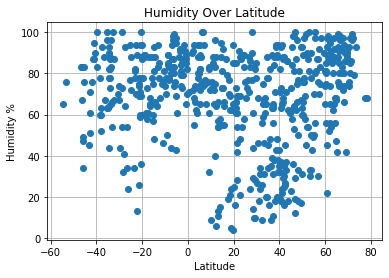

In [120]:
#plot line plot
fig2, ax2 = plt.subplots()

x_latitude= weather_df['Lat']
y_humidity= weather_df['Humidity']

ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity %')
ax2.set_title('Humidity Over Latitude')

ax2.plot(x_latitude, y_humidity, 'o')

# Set a grid on the plot
plt.grid()


plt.show()
fig2.savefig("Humidity_v_Latitude.png")

#### The above plot is observing the relationship between Humidity of the randomly imported cities over the entirety of the world.

## Latitude vs. Cloudiness Plot

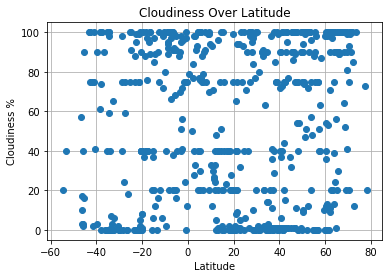

In [122]:
#plot line plot
fig3, ax3 = plt.subplots()

x_latitude= weather_df['Lat']
y_cloudiness= weather_df['Cloudiness']

ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness %')
ax3.set_title('Cloudiness Over Latitude')

ax3.plot(x_latitude, y_cloudiness, 'o')

# Set a grid on the plot
plt.grid()


plt.show()
fig3.savefig("Cloudiness_v_Latitude.png")

#### The above plot is observing the relationship between Cloudiness of the randomly imported cities over the entirety of the world.

## Latitude vs. Wind Speed Plot

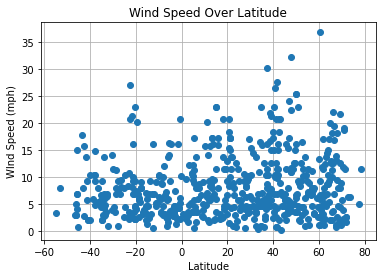

In [123]:
#plot line plot
fig4, ax4 = plt.subplots()

x_latitude= weather_df['Lat']
y_wind= weather_df['Wind Speed']

ax4.set_xlabel('Latitude')
ax4.set_ylabel('WInd Speed (mph)')
ax4.set_title('Wind Speed Over Latitude')

ax4.plot(x_latitude, y_wind, 'o')

# Set a grid on the plot
plt.grid()
# figure(figsize=(2, 3), dpi=80)

plt.show()
fig4.savefig("Wind_v_Latitude.png")

#### The above plot is observing the relationship between Wind of the randomly imported cities over the entirety of the world.

In [53]:
northern_df= weather_df.loc[(weather_df['Lat'] >= 0)]
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chapais,49.7834,-74.8492,46.40,31,75,14.97,CA,1619901681
2,at-bashi,41.1702,75.8106,51.89,65,100,2.57,KG,1619901682
6,ostrovnoy,68.0531,39.5131,29.21,94,100,18.19,RU,1619901685
10,xining,36.6167,101.7667,51.08,39,41,2.19,CN,1619901547
11,bubaque,11.2833,-15.8333,78.69,72,26,20.20,GW,1619901688
...,...,...,...,...,...,...,...,...,...
563,miri,4.4148,114.0089,77.00,88,20,3.44,MY,1619901785
565,amazar,53.8580,120.8750,38.86,78,96,0.96,RU,1619902057
566,qiqihar,47.3408,123.9672,46.11,62,11,5.32,CN,1619902057
567,vila do maio,15.1333,-23.2167,71.60,73,20,23.02,CV,1619902058


In [128]:
southern_df= weather_df.loc[(weather_df['Lat'] < 0)]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bluff,-46.6000,168.3333,48.99,83,57,3.00,NZ,1619901682
3,kiunga,-6.1219,141.2906,72.14,99,92,1.63,PG,1619901683
4,mataura,-46.1927,168.8643,48.99,83,17,3.00,NZ,1619901684
5,gizo,-8.1030,156.8419,79.59,83,100,10.02,SB,1619901685
7,port alfred,-33.5906,26.8910,61.27,65,0,4.81,ZA,1619901686
...,...,...,...,...,...,...,...,...,...
547,grand baie,-20.0182,57.5802,75.00,88,8,4.00,MU,1619902052
555,manaus,-3.1019,-60.0250,86.00,74,40,3.44,BR,1619902054
557,vao,-22.6667,167.4833,74.53,70,99,26.96,NC,1619902055
564,isangel,-19.5500,169.2667,77.31,78,100,20.24,VU,1619902057


## Linear Regression

####  Northern & Southern Hemisphere - Max Temp vs. Latitude Linear Regression

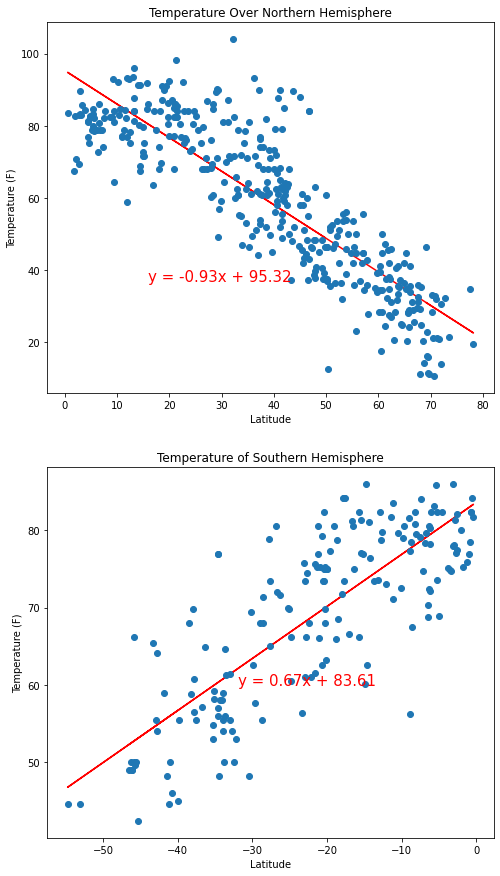

In [129]:
#plot line plot
fig5, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=False, sharey=False, squeeze=True)

#set northern and southern x axis
x_northern= northern_df['Lat']
x_southern= southern_df['Lat']

#create y axis for the two plots
y_temp_northern= northern_df['Max Temp']
y_temp_southern= southern_df['Max Temp']




#Northern Hemisphere Linear Regression
# unpacking 
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = linregress(x_northern, y_temp_northern)

# y = mx + b
regress_values_n = x_northern * slope_n + intercept_n

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))


# ax3.plot(x_weight, y_volume, 'o')

#lin regress line

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))
ax1.annotate(line_regress_eq_n,(16,37),fontsize=15,color="red")
ax1.plot(x_northern,regress_values_n,"r-")


#Southern Hemisphere Linear Regression
# unpacking 
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = linregress(x_southern, y_temp_southern)

# y = mx + b
regress_values_s = x_southern * slope_s + intercept_s

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))



#lin regress line

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))
#ax2.annotate(line_regress_eq_s,(18,37),fontsize=15,color="red")
ax2.plot(x_southern,regress_values_s,"r-")
ax2.annotate(line_regress_eq_s,(-32,60),fontsize=15,color="red")






ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (F)')
ax1.set_title('Temperature Over Northern Hemisphere')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Temperature (F)')
ax2.set_title('Temperature of Southern Hemisphere')

# #limits
# plt.xlim(13, (x_weight.max()+1).item())
# plt.ylim(32, (y_volume.max()+2).item())

ax1.plot(x_northern, y_temp_northern, 'o')
ax2.plot(x_southern, y_temp_southern, 'o')
# ax3.plot(x_latitude, y_cloudiness, 'o')
# ax4.plot(x_latitude, y_wind, 'o')
# Set a grid on the plot
fig5.set_size_inches(8, 15, forward=True)
plt.show()
fig5.savefig("Temp_via_Hemisphere.png")

#### This pair of plots observes the relationship between temperature and latitude seperately between the northern and southern hemisphere. Both plots show a siginificant trend of temperature increasing as it approaches the equator. 

####  Northern & Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

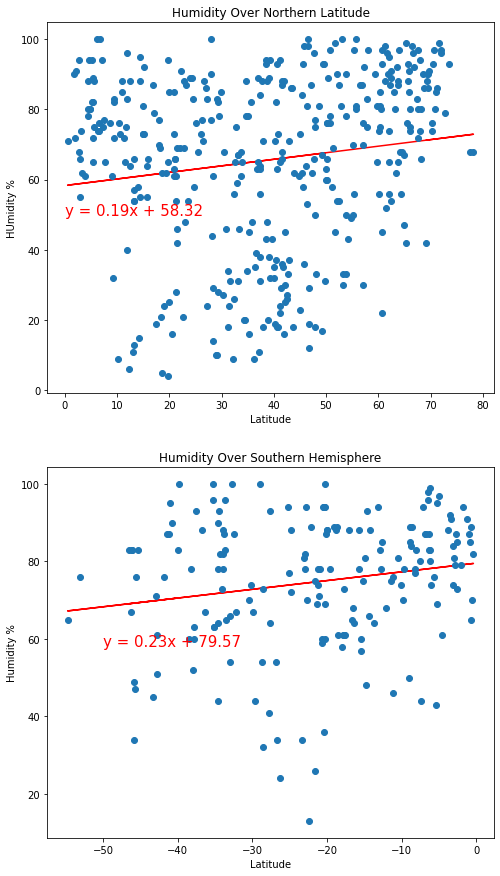

In [130]:
#plot line plot
fig6, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=False, sharey=False, squeeze=True)

#set northern and southern x axis
x_northern= northern_df['Lat']
x_southern= southern_df['Lat']

#create y axis for the two plots
y_humidity_northern= northern_df['Humidity']
y_humidity_southern= southern_df['Humidity']




#Northern Hemisphere Linear Regression
# unpacking 
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = linregress(x_northern, y_humidity_northern)

# y = mx + b
regress_values_n = x_northern * slope_n + intercept_n

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))


# ax3.plot(x_weight, y_volume, 'o')

#lin regress line

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))
ax1.annotate(line_regress_eq_n,(0,50),fontsize=15,color="red")
ax1.plot(x_northern,regress_values_n,"r-")


#Southern Hemisphere Linear Regression
# unpacking 
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = linregress(x_southern, y_humidity_southern)

# y = mx + b
regress_values_s = x_southern * slope_s + intercept_s

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))



#lin regress line

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))
#ax2.annotate(line_regress_eq_s,(18,37),fontsize=15,color="red")
ax2.plot(x_southern,regress_values_s,"r-")
ax2.annotate(line_regress_eq_s,(-50,58),fontsize=15,color="red")






ax1.set_xlabel('Latitude')
ax1.set_ylabel('HUmidity %')
ax1.set_title('Humidity Over Northern Latitude')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity %')
ax2.set_title('Humidity Over Southern Hemisphere')



ax1.plot(x_northern, y_humidity_northern, 'o')
ax2.plot(x_southern, y_humidity_southern, 'o')
# ax3.plot(x_latitude, y_cloudiness, 'o')
# ax4.plot(x_latitude, y_wind, 'o')
# Set a grid on the plot
fig6.set_size_inches(8, 15, forward=True)
plt.show()
fig6.savefig("Humidity_via_Hemisphere.png")

#### The percent of humidity dependent on latitude shows little significance. Visually, it is difficult to determine any signifince, but statistically, using the linear regression line and equation, both hemispheres yield a minorly positive relationship.

####  Northern & Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

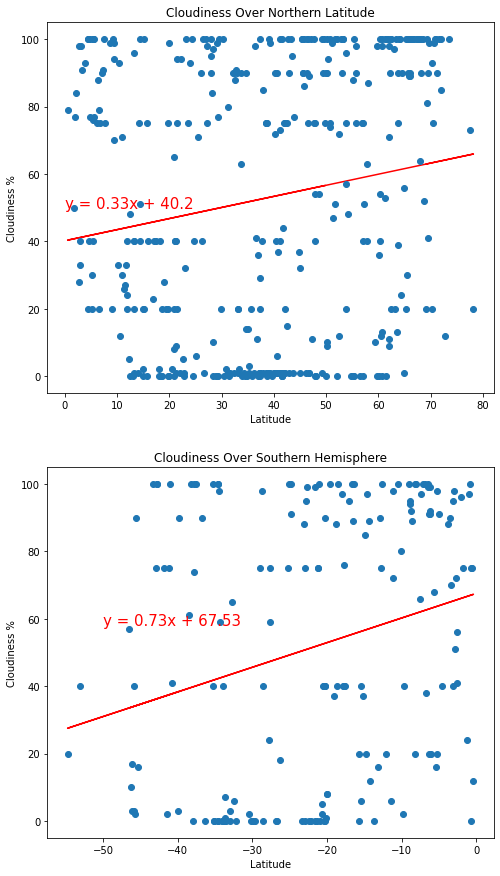

In [131]:
#plot line plot
fig7, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=False, sharey=False, squeeze=True)

#set northern and southern x axis
x_northern= northern_df['Lat']
x_southern= southern_df['Lat']

#create y axis for the two plots
y_cloudiness_northern= northern_df['Cloudiness']
y_cloudiness_southern= southern_df['Cloudiness']




#Northern Hemisphere Linear Regression
# unpacking 
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = linregress(x_northern, y_cloudiness_northern)

# y = mx + b
regress_values_n = x_northern * slope_n + intercept_n

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))


# ax3.plot(x_weight, y_volume, 'o')

#lin regress line

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))
ax1.annotate(line_regress_eq_n,(0,50),fontsize=15,color="red")
ax1.plot(x_northern,regress_values_n,"r-")


#Southern Hemisphere Linear Regression
# unpacking 
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = linregress(x_southern, y_cloudiness_southern)

# y = mx + b
regress_values_s = x_southern * slope_s + intercept_s

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))



#lin regress line

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))
#ax2.annotate(line_regress_eq_s,(18,37),fontsize=15,color="red")
ax2.plot(x_southern,regress_values_s,"r-")
ax2.annotate(line_regress_eq_s,(-50,58),fontsize=15,color="red")






ax1.set_xlabel('Latitude')
ax1.set_ylabel('Cloudiness %')
ax1.set_title('Cloudiness Over Northern Latitude')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Cloudiness %')
ax2.set_title('Cloudiness Over Southern Hemisphere')



ax1.plot(x_northern, y_cloudiness_northern, 'o')
ax2.plot(x_southern, y_cloudiness_southern, 'o')
# ax3.plot(x_latitude, y_cloudiness, 'o')
# ax4.plot(x_latitude, y_wind, 'o')
# Set a grid on the plot
fig7.set_size_inches(8, 15, forward=True)
plt.show()
fig7.savefig("Cloudiness_via_Hemisphere.png")

#### The plotted data of cloudiness percentage between both hemispheres appears to hold no significant relationship with latitude location. The cloudiness data does appear to group at certain humidity perecentages unrelated to latitude. 

####  Northern & Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

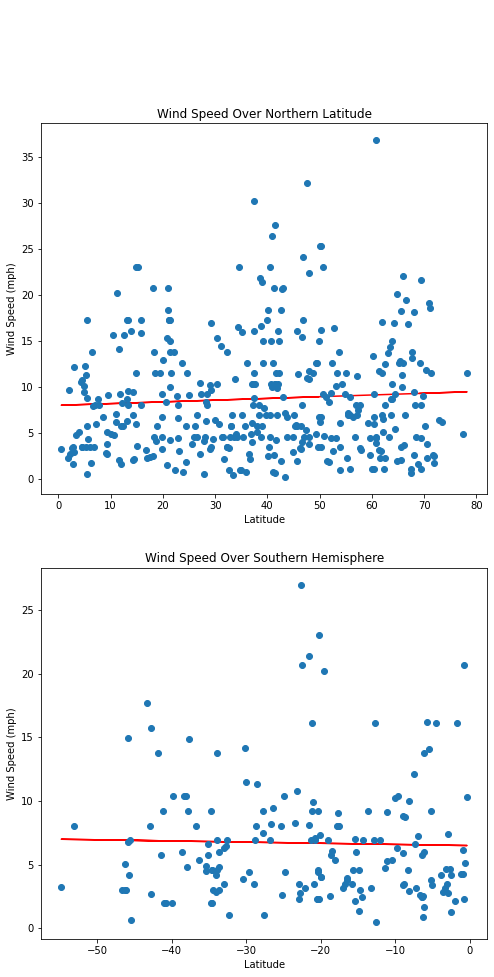

In [132]:
#plot line plot
fig8, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=False, sharey=False, squeeze=True)

#set northern and southern x axis
x_northern= northern_df['Lat']
x_southern= southern_df['Lat']

#create y axis for the two plots
y_wind_northern= northern_df['Wind Speed']
y_wind_southern= southern_df['Wind Speed']




#Northern Hemisphere Linear Regression
# unpacking 
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = linregress(x_northern, y_wind_northern)

# y = mx + b
regress_values_n = x_northern * slope_n + intercept_n

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))


# ax3.plot(x_weight, y_volume, 'o')

#lin regress line

line_regress_eq_n = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))
ax1.annotate(line_regress_eq_n,(0,50),fontsize=15,color="red")
ax1.plot(x_northern,regress_values_n,"r-")


#Southern Hemisphere Linear Regression
# unpacking 
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = linregress(x_southern, y_wind_southern)

# y = mx + b
regress_values_s = x_southern * slope_s + intercept_s

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))



#lin regress line

line_regress_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))
#ax2.annotate(line_regress_eq_s,(18,37),fontsize=15,color="red")
ax2.plot(x_southern,regress_values_s,"r-")
ax2.annotate(line_regress_eq_s,(-50,58),fontsize=15,color="red")






ax1.set_xlabel('Latitude')
ax1.set_ylabel('Wind Speed (mph)')
ax1.set_title('Wind Speed Over Northern Latitude')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Wind Speed (mph)')
ax2.set_title('Wind Speed Over Southern Hemisphere')



ax1.plot(x_northern, y_wind_northern, 'o')
ax2.plot(x_southern, y_wind_southern, 'o')
# ax3.plot(x_latitude, y_cloudiness, 'o')
# ax4.plot(x_latitude, y_wind, 'o')
# Set a grid on the plot
fig8.set_size_inches(8, 15, forward=True)
plt.show()
fig8.savefig("Wind_via_Hemisphere.png")

####  The plotted data of wind speed between both hemispheres appears to hold no significant relationship with latitude location. The randomally collected data seems to imply that wind speeds are slightly higher on average in the northern hemisphere. More data may need to be taken to make a conclusive statement on this finding.